In [0]:
# 1(a). Generate a dataset by sampling 1,600 values from a quadratic 
# function, with noise added to the sampled values.
import numpy
num_samples = 1600
X = numpy.random.rand(num_samples, 1)
Y = X**2+4*X+4
noise = numpy.random.randn(num_samples, 1)
Y_withNoise = Y + noise

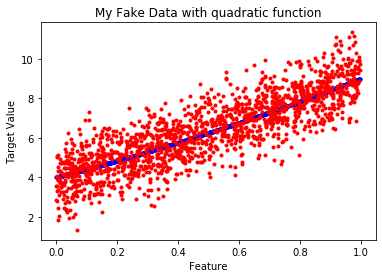

In [144]:
#Visualize our data
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X, Y, "b.")
plt.plot(X, Y_withNoise, "r.")
plt.xlabel("Feature")
plt.ylabel("Target Value")
plt.title("My Fake Data with quadratic function")
plt.show()

In [0]:
# 1(b). Create an 80/20 train/test split of the dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_withNoise,
test_size=0.2, random_state = 42)

In [0]:
# 1(c). Regression models in Linear
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, Y_train)
 
Y_predicted_lr = lr_model.intercept_ + lr_model.coef_*X_test
linear_mse = mean_squared_error(Y_test, Y_predicted_lr)

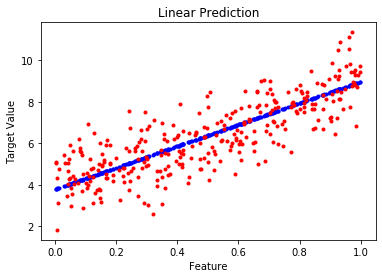

In [147]:
%matplotlib inline
plt.plot(X_test, Y_predicted_lr, "b.")
plt.plot(X_test, Y_test, "r.")
plt.xlabel("Feature")
plt.ylabel("Target Value")
plt.title("Linear Prediction")
plt.show()

In [0]:
# 1(c). Regression models in polynomial (to the 4th degree)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_polyTrain, X_polyTest, Y_polyTrain, Y_polyTest = train_test_split(X_poly,
Y_withNoise, test_size = 0.2, random_state = 42)

In [0]:
# 1(c). Regression models in polynomial (to the 4th degree) without 
# regularization
poly_model = linear_model.LinearRegression()
poly_model.fit(X_polyTrain, Y_polyTrain)
Y_polyPredicted = poly_model.predict(X_polyTest)
poly_mse = mean_squared_error(Y_polyTest, Y_polyPredicted)

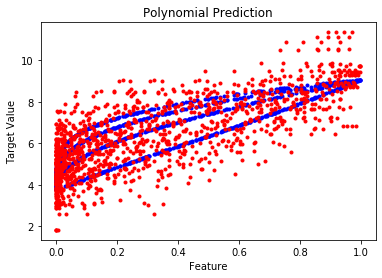

In [150]:
%matplotlib inline
plt.plot(X_polyTest, Y_polyPredicted, "b.")
plt.plot(X_polyTest, Y_polyTest, "r.")
plt.xlabel("Feature")
plt.ylabel("Target Value")
plt.title("Polynomial Prediction")
plt.show()

In [0]:
# 1(c). Regression models in polynomial (to the 4th degree) with 
# Ridge regularization (regularization strength set to 0.5)
poly_model_ridge = linear_model.Ridge(alpha=0.5)
poly_model_ridge.fit(X_polyTrain, Y_polyTrain)
Y_polyPredicted_ridge = poly_model_ridge.predict(X_polyTest)
poly_ridge_mse = mean_squared_error(Y_polyTest, Y_polyPredicted_ridge)

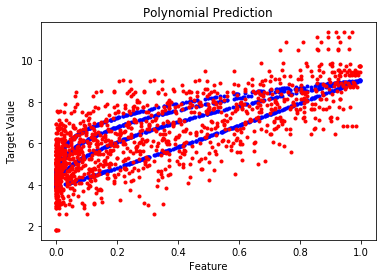

In [152]:
%matplotlib inline
plt.plot(X_polyTest, Y_polyPredicted_ridge, "b.")
plt.plot(X_polyTest, Y_polyTest, "r.")
plt.xlabel("Feature")
plt.ylabel("Target Value")
plt.title("Polynomial Prediction")
plt.show()

In [0]:
# 1(c). Regression models in polynomial (to the 4th degree) with 
# Lasso regularization (regularization strength set to 0.5)
poly_model_lasso = linear_model.Lasso(alpha=0.5)
poly_model_lasso.fit(X_polyTrain, Y_polyTrain)
Y_polyPredicted_lasso = poly_model_lasso.predict(X_polyTest)
poly_lasso_mse = mean_squared_error(Y_polyTest, Y_polyPredicted_lasso)

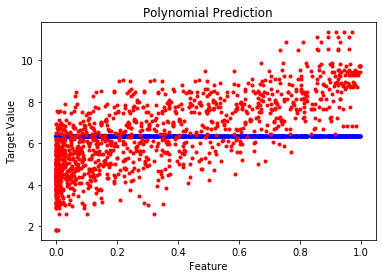

In [154]:
%matplotlib inline
plt.plot(X_polyTest, Y_polyPredicted_lasso, "b.")
plt.plot(X_polyTest, Y_polyTest, "r.")
plt.xlabel("Feature")
plt.ylabel("Target Value")
plt.title("Polynomial Prediction")
plt.show()

In [155]:
#1(c). Show all the 4 MSE
print("Linear: ", linear_mse)
print("Poly: ", poly_mse)
print("Poly with Ridge: ", poly_ridge_mse)
print("Poly with Lasso: ", poly_lasso_mse)

Linear:  1.0532673213506267
Poly:  1.0444826643639378
Poly with Ridge:  1.0368065237496857
Poly with Lasso:  3.146024638931613


1(b). From the above modeling process, we can clearly recognize that the 4 models perform differently based on the same dataset. The linear model performed relatively better compare to the other 3 polynomial regression models. 

  In the linear model, the test data were equally distributed between the two sides of the regression line. Also, the general trend of the test data can be correctly reflected. so linear model is the best option among these 4 models.  
  
  However, in the other 2 polynomial regression models(without/ with ridge regularization), the model used 3 curves respectively to fit the pattern of the data, though they can somewhat reflect the pattern of the data, they are too sensitive to this specific dataset. These 2 models are considered overfitting.  
  
  In the other model with lasso regularization, the model neither had a great fit with the dataset, nor reflected the general trend of the data correctly, so this model should be considered underfitting.  
  
  If we see from the MSE perspective, we can also get the same conclusion. The overfitted 2 models had the MSE even smaller than linear model, but this result could made was because they sacrificed the general fitting pattern and become extremely sensitive to this specific dataset, and still did not make a siginificant progress on MSE compared to Linear model. Also, the lasso model had the biggest MSE which suggested the prediction of this model had a lot of errors and it was underfitting. 


In [0]:
# 2(a). Load a real dataset not covered in class that is designed 
#for the regression problem; e.g., from sklearn.datasets, 
#Kaggle, your own data, etc.
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [0]:
# 2(b). Create a 60/20/20 train/val/test split of the dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(diabetes.data, 
diabetes.target, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 
test_size=0.25, random_state=42)

In [0]:
# 2(c).Plot performance curves for the polynomial regression model 
# (to the 4th degree)
# Split the data
num = 10

X_poly = poly_features.fit_transform(diabetes.data)
X_polyTrain, X_polyTest, Y_polyTrain, Y_polyTest = train_test_split(
    X_poly, diabetes.target, test_size = 0.2, random_state = 42)
X_polyTrain, X_polyVal, Y_polyTrain, Y_polyVal = train_test_split(
    X_polyTrain, Y_polyTrain, test_size=0.25, random_state=42)

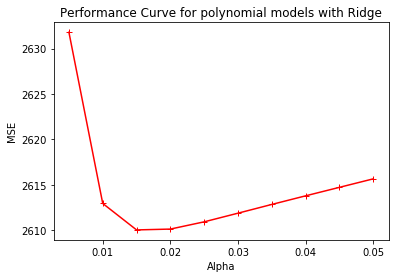

In [252]:
# specify alpha in 10 different value to see the MSE and the 
#performance curves with Ridge Regularization
poly_ridge_mse = list()
reg_strength = [0.005*i for i in range(1, num+1)]
for i in range(0, num):
  poly_model_ridge = linear_model.Ridge(alpha=reg_strength[i])
  poly_model_ridge.fit(X_polyTrain, Y_polyTrain)
  Y_polyPredicted_ridge = poly_model_ridge.predict(X_polyVal)
  poly_ridge_mse.append(mean_squared_error(Y_polyVal, Y_polyPredicted_ridge))

%matplotlib inline
plt.plot(reg_strength, poly_ridge_mse, "r-+")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("Performance Curve for polynomial models with Ridge")
plt.show()

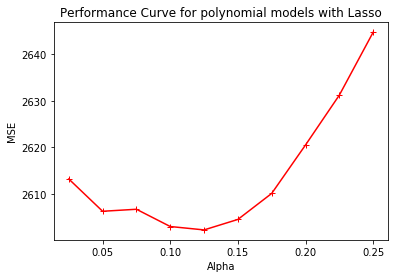

In [253]:
# specify alpha in 10 different value to see the MSE and the 
#performance curves with Lasso Regularization
poly_lasso_mse = list()
reg_strength = [0.025*i for i in range(1, num+1)]
for i in range(0, num):
  poly_model_lasso = linear_model.Lasso(alpha=reg_strength[i])
  poly_model_lasso.fit(X_polyTrain, Y_polyTrain)
  Y_polyPredicted_lasso = poly_model_lasso.predict(X_polyVal)
  poly_lasso_mse.append(mean_squared_error(Y_polyVal, Y_polyPredicted_lasso))

%matplotlib inline
plt.plot(reg_strength, poly_lasso_mse, "r-+")
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.title("Performance Curve for polynomial models with Lasso")
plt.show()

From the above performance curve we can identify that the best alpha value should be the place with the lowest MSE.  
For polynomial model with Ridge regularization, the best alpha value is approximately equal to 0.015  
Whereas for polynomial model with Lasso regularization, the best alpha value is approximately equal to 0.125

In [254]:
# 2(d). Evaluate Ridge with alpha = 0.015
poly_model_ridge = linear_model.Ridge(alpha=0.015)
poly_model_ridge.fit(X_polyTrain, Y_polyTrain)
Y_polyPredicted_ridge = poly_model_ridge.predict(X_polyTest)
MSE = mean_squared_error(Y_polyTest, Y_polyPredicted_ridge)
print("MSE = " + str(MSE))

MSE = 2787.217284898168


In [255]:
# 2(d). Evaluate Lasso with alpha = 0.125
poly_model_lasso = linear_model.Lasso(alpha=0.125)
poly_model_lasso.fit(X_polyTrain, Y_polyTrain)
Y_polyPredicted_lasso = poly_model_lasso.predict(X_polyTest)
MSE = mean_squared_error(Y_polyTest, Y_polyPredicted_lasso)
print("MSE = " + str(MSE))

MSE = 2796.063845936906


In [0]:
# 3(a). Load a real dataset not covered in class that is designed 
# for the classification; e.g., from sklearn.datasets, Kaggle, 
# your own data, etc.
from sklearn.datasets import load_iris
iris = load_iris()
num = 10

In [0]:
# 3(b). Create a 60/20/20 train/val/test split of the dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, 
iris.target, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, 
test_size=0.25, random_state=42)

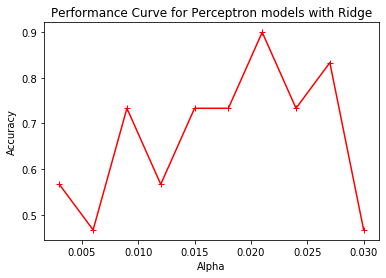

In [314]:
# 3(c). Examine the impact of regularization for the Perceptron model.
# Using Ridge
from sklearn.linear_model import Perceptron

ridge_alpha_list = [0.003*i for i in range(1, num+1)]
ridge_accuracy_list = []
for i in range(0, num):
  classifier = Perceptron(random_state=0, 
  penalty="l2",alpha=ridge_alpha_list[i])
  classifier.fit(X_train, Y_train)
  accuracy = classifier.score(X_val, Y_val)
  ridge_accuracy_list.append(accuracy)

%matplotlib inline
plt.plot(ridge_alpha_list, ridge_accuracy_list, "r-+")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Performance Curve for Perceptron models with Ridge")
plt.show()

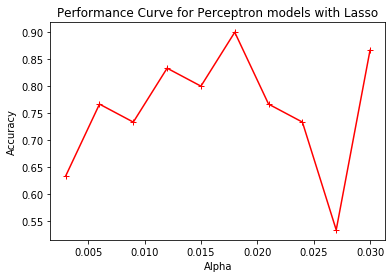

In [320]:
# 3(c). Examine the impact of regularization for the Perceptron model.
# Using Lasso
from sklearn.linear_model import Perceptron

lasso_alpha_list = [0.003*i for i in range(1, num+1)]
lasso_accuracy_list = []
for i in range(0, num):
  classifier = Perceptron(random_state=0, 
  penalty="l1",alpha=lasso_alpha_list[i])
  classifier.fit(X_train, Y_train)
  accuracy = classifier.score(X_val, Y_val)
  lasso_accuracy_list.append(accuracy)

%matplotlib inline
plt.plot(lasso_alpha_list, lasso_accuracy_list, "r-+")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Performance Curve for Perceptron models with Lasso")
plt.show()

From the above performance curve we can identify that the best alpha value should be the place with the highest Accuracy.  
For perceptron model with Ridge regularization, the best alpha value is approximately equal to 0.021  
Whereas for perceptron model with Lasso regularization, the best alpha value is approximately equal to 0.018

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

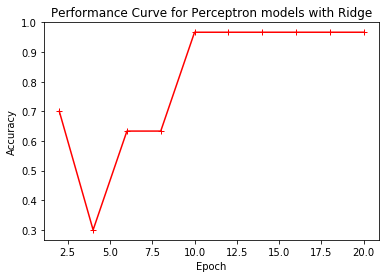

In [329]:
# 3(d). Find the best epoch value
# Using Ridge
ridge_epoch_list = [2*i for i in range(1, num+1)]
ridge_accuracy_list = []
for i in range(len(ridge_epoch_list)):
  classifier = Perceptron(random_state=0, penalty="l2",alpha=0.021, 
  max_iter=ridge_epoch_list[i])
  classifier.fit(X_train, Y_train)
  accuracy = classifier.score(X_test, Y_test)
  ridge_accuracy_list.append(accuracy)
%matplotlib inline
plt.plot(ridge_epoch_list, ridge_accuracy_list, "r-+")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Performance Curve for Perceptron models with Ridge")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

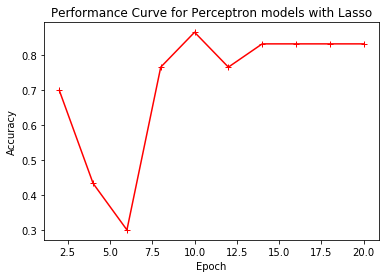

In [332]:
# 3(d). Find the best epoch value
# Using Lasso
lasso_epoch_list = [2*i for i in range(1, num+1)]
lasso_accuracy_list = []
for i in range(len(lasso_epoch_list)):
  classifier = Perceptron(random_state=0, penalty="l1",alpha=0.018, 
  max_iter=lasso_epoch_list[i])
  classifier.fit(X_train, Y_train)
  accuracy = classifier.score(X_test, Y_test)
  lasso_accuracy_list.append(accuracy)
%matplotlib inline
plt.plot(lasso_epoch_list, lasso_accuracy_list, "r-+")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Performance Curve for Perceptron models with Lasso")
plt.show()

From the above performance curve we can identify that the best epoch number should be the place with the highest Accuracy.  
For perceptron model with Ridge regularization, the best epoch number is approximately equal to 10  
Also, for perceptron model with Lasso regularization, the best epoch number is approximately equal to 10

3(e). We have found the best alpha and epoch for both perceptron models. However, we still got the warning that "**Maximum number of iteration reached before convergence**".This means our perceptron model based on linear regression cannot effectively make the prediction results become convergent, which also means this model is underfitting. Based on this conclusion, I think if we change our perceptron model based on polynomial regression, the model would perform better.  
Also, the epoch and alpha affect the performance differently. With epoch, the accuracy will reach to a stable number while the epoch is becoming bigger. However, as for alpha, there would be only one value for the best performance, all the other values will lead to worse performance.